In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from pylab import mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

In [15]:
data1=pd.DataFrame({"光功率uW":[0,5,10],"电压mV":[4.4,18.7,32.3]})
data1["短路电流uA"]=(data1["电压mV"]*1e-3)/10e3*1e6
data1

,光功率uW,电压mV,短路电流uA
0,0,4.4,0.44
1,5,18.7,1.87
2,10,32.3,3.23


拟合曲线方程参数： [0.279      0.45166667]


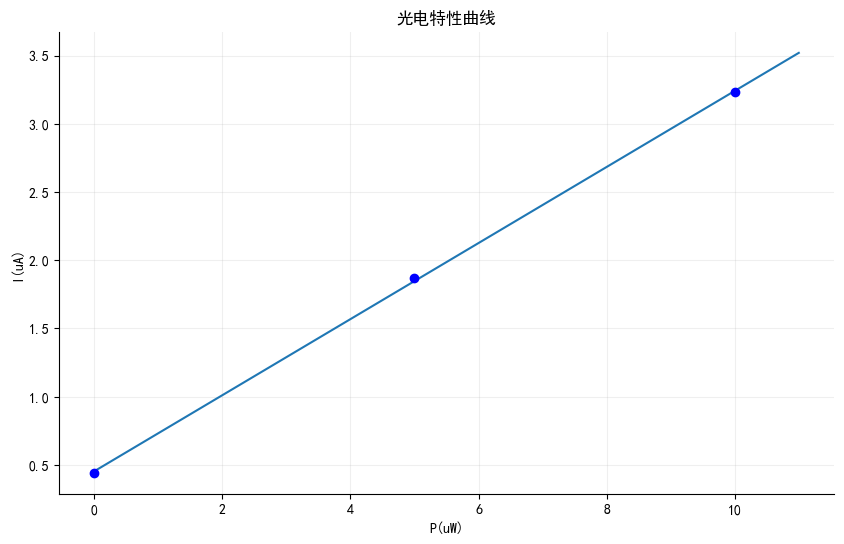

In [20]:
fig, ax = plt.subplots(1,1,figsize=(10, 6))
axs=[ax]
axs[0].set_title('光电特性曲线')

def fit_func(x, a, b):
    return a*x+b

params, _ = curve_fit(fit_func, data1["光功率uW"], data1["短路电流uA"])
axs[0].plot(np.linspace(0,11,20), fit_func(np.linspace(0,11,20), *params), label='Fitted curve')
axs[0].plot(data1["光功率uW"],data1["短路电流uA"],'bo')
axs[0].set_xlabel('P(uW)')
axs[0].set_ylabel('I(uA)')
axs[0].spines[["top", "right"]].set_visible(False)

axs[0].grid(alpha=0.2)
R=params[0]
print("拟合曲线方程参数：",params)

In [22]:
data2=pd.DataFrame({"工作电流mA":[10,20,30],"接收信号电压mVpp":[70,150,85]})
data2["LED光功率峰峰值uW"]=data2["接收信号电压mVpp"]*1e3/(R*10e3)
data2

,工作电流mA,接收信号电压mVpp,LED光功率峰峰值uW
0,10,70,25.089606
1,20,150,53.763441
2,30,85,30.465950
